---

_You are currently looking at **version 1.2** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-social-network-analysis/resources/yPcBs) course resource._

---

# Assignment 2 - Network Connectivity

In this assignment you will go through the process of importing and analyzing an internal email communication network between employees of a mid-sized manufacturing company. 
Each node represents an employee and each directed edge between two nodes represents an individual email. The left node represents the sender and the right node represents the recipient.

In [1]:
import networkx as nx

# This line must be commented out when submitting to the autograder
#!head email_network.txt

#Sender	Recipient	time
1	2	1262454010
1	3	1262454010
1	4	1262454010
1	5	1262454010
1	6	1262454010
1	7	1262454010
1	8	1262454010
1	9	1262454010
1	10	1262454010


### Question 1

Using networkx, load up the directed multigraph from `email_network.txt`. Make sure the node names are strings.

*This function should return a directed multigraph networkx graph.*

In [4]:
def answer_one():
    
    G = nx.read_edgelist('email_network.txt', delimiter='\t', data=[('time', int)], create_using=nx.MultiDiGraph())
 
    return G

<IPython.core.display.Javascript object>


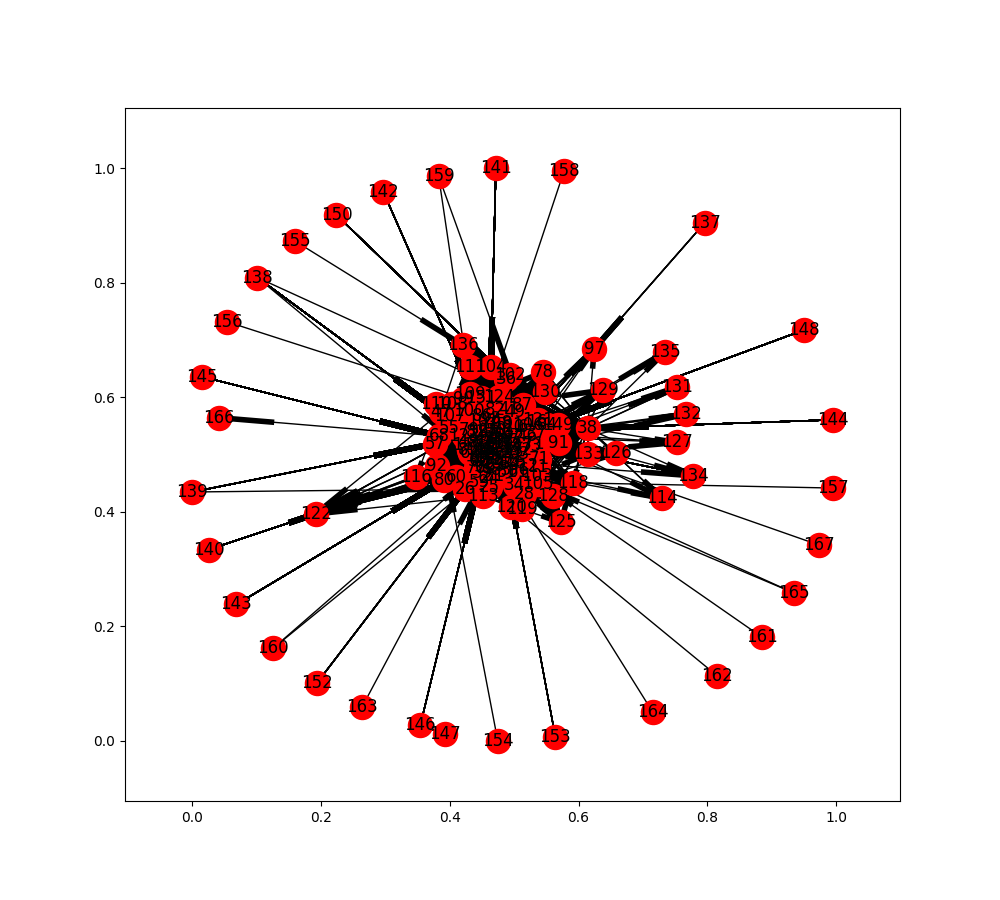

In [22]:
# create the visual
#%matplotlib notebook

#import networkx as nx
#import matplotlib.pyplot as plt

# draw the graph using the default spring layout
#plt.figure(figsize=(10,9))
#nx.draw_networkx(answer_one())

### Question 2

How many employees and emails are represented in the graph from Question 1?

*This function should return a tuple (#employees, #emails).*

In [5]:
def answer_two():
        
    G = answer_one()
    
    return len(G.nodes()), len(G.edges())

### Question 3

* Part 1. Assume that information in this company can only be exchanged through email.

    When an employee sends an email to another employee, a communication channel has been created, allowing the sender to provide information to the receiver, but not vice versa. 

    Based on the emails sent in the data, is it possible for information to go from every employee to every other employee?


* Part 2. Now assume that a communication channel established by an email allows information to be exchanged both ways. 

    Based on the emails sent in the data, is it possible for information to go from every employee to every other employee?


*This function should return a tuple of bools (part1, part2).*

In [7]:
def answer_three():    
    G = answer_one()
    return nx.is_strongly_connected(G), nx.is_connected(G.to_undirected())

(False, True)

### Question 4

How many nodes are in the largest (in terms of nodes) weakly connected component?

*This function should return an int.*

In [8]:
def answer_four():
    G = answer_one()
    wccs = nx.weakly_connected_components(G)
    return len(max(wccs, key=len))
#answer_four()

167

### Question 5

How many nodes are in the largest (in terms of nodes) strongly connected component?

*This function should return an int*

In [9]:
def answer_five():
    G = answer_one()
    sccs = nx.strongly_connected_components(G)
    return len(max(sccs, key=len))
#answer_five()

126

### Question 6

Using the NetworkX function strongly_connected_component_subgraphs, find the subgraph of nodes in a largest strongly connected component. 
Call this graph G_sc.

*This function should return a networkx MultiDiGraph named G_sc.*

In [10]:
def answer_six():
    G = answer_one()
    scc_subs = nx.strongly_connected_component_subgraphs(G)
    G_sc = max(scc_subs, key=len)
    return G_sc
#answer_six()

### Question 7

What is the average distance between nodes in G_sc?

*This function should return a float.*

In [11]:
def answer_seven():
    G = answer_six()
    return nx.average_shortest_path_length(G)
#answer_seven()

1.6461587301587302

### Question 8

What is the largest possible distance between two employees in G_sc?

*This function should return an int.*

In [13]:
def answer_eight():
    G = answer_six()
    return nx.diameter(G)
#answer_eight()

3

### Question 9

What is the set of nodes in G_sc with eccentricity equal to the diameter?

*This function should return a set of the node(s).*

In [14]:
def answer_nine():
    G = answer_six()
    return set(nx.periphery(G))
#answer_nine()

{'129', '134', '97'}

### Question 10

What is the set of node(s) in G_sc with eccentricity equal to the radius?

*This function should return a set of the node(s).*

In [15]:
def answer_ten():
    G = answer_six()
    return set(nx.center(G))
#answer_ten()

{'38'}

### Question 11

Which node in G_sc is connected to the most other nodes by a shortest path of length equal to the diameter of G_sc?

How many nodes are connected to this node?


*This function should return a tuple (name of node, number of satisfied connected nodes).*

In [16]:
def answer_eleven():
    G = answer_six()
    d = nx.diameter(G)
    peripheries = nx.periphery(G)
    max_count = -1
    result_node = None
    for node in peripheries:
        count = 0
        sp = nx.shortest_path_length(G, node)
        for key, value in sp.items():
            if value == d:
                count += 1        
        if count > max_count:
            result_node = node
            max_count = count

    return result_node, max_count
#answer_eleven()

('97', 63)

### Question 12

Suppose you want to prevent communication from flowing to the node that you found in the previous question from any node in the center of G_sc, what is the smallest number of nodes you would need to remove from the graph (you're not allowed to remove the node from the previous question or the center nodes)? 

*This function should return an integer.*

In [17]:
def answer_twelve():
    G = answer_six()
    center = nx.center(G)[0]
    node = answer_eleven()[0]
    return len(nx.minimum_node_cut(G, center, node))
#answer_twelve()

5

### Question 13

Construct an undirected graph G_un using G_sc (you can ignore the attributes).

*This function should return a networkx Graph.*

In [18]:
def answer_thirteen():
    G = answer_six()
    undir_subgraph = G.to_undirected()
    G_un = nx.Graph(undir_subgraph)
    return G_un
#answer_thirteen()

<IPython.core.display.Javascript object>


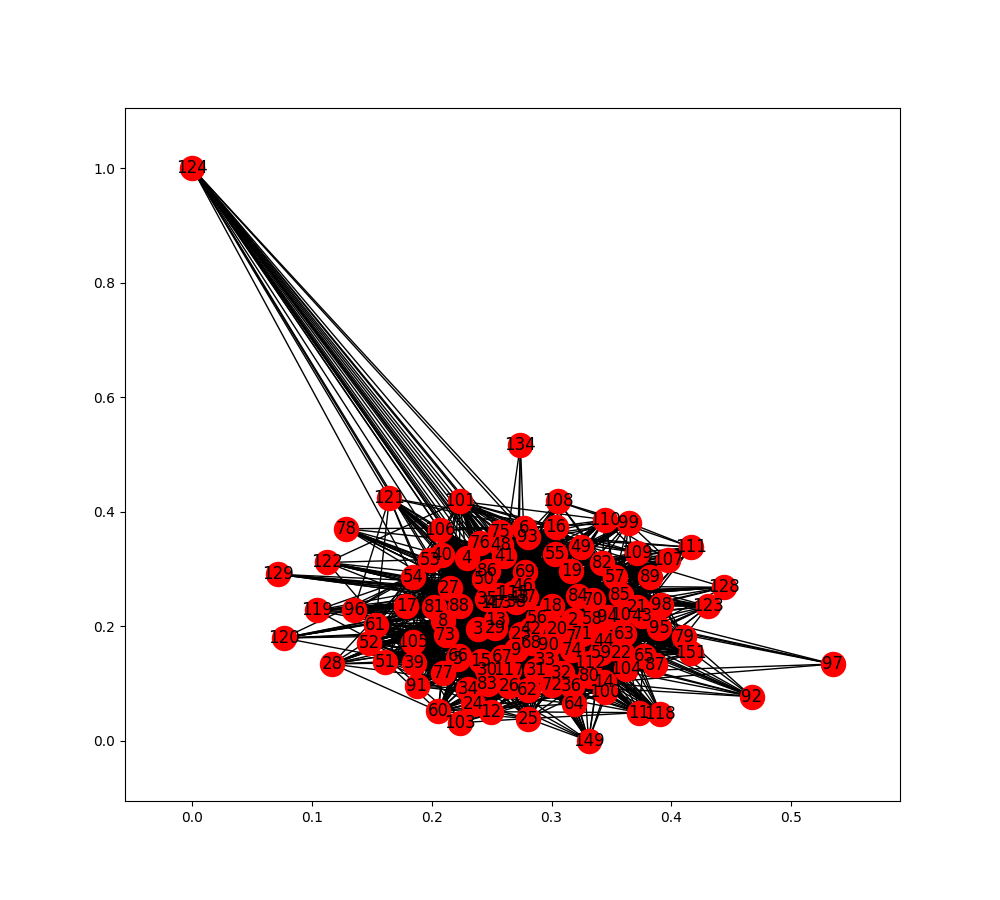

In [21]:
# create the visual
#%matplotlib notebook

#import networkx as nx
#import matplotlib.pyplot as plt

# draw the graph using the default spring layout
#plt.figure(figsize=(10,9))
#nx.draw_networkx(answer_thirteen())

### Question 14

What is the transitivity and average clustering coefficient of graph G_un?

*This function should return a tuple (transitivity, avg clustering).*

In [19]:
def answer_fourteen():
    G = answer_thirteen()
    return nx.transitivity(G), nx.average_clustering(G)
#answer_fourteen()

(0.570111160700385, 0.6975272437231418)